In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Load the dataset
file_path = 'refined_social_media_data.csv'  # Path to the refined dataset
data = pd.read_csv(file_path)

# Step 1: Strip spaces from column names and remove unnecessary columns
data.columns = data.columns.str.strip()
if 'Unnamed: 6' in data.columns:
    data.drop(columns=['Unnamed: 6'], inplace=True)

# Step 2: Inspect missing and invalid values
print("\nInitial Dataset Shape:", data.shape)
print("\nMissing values per column (before handling):")
print(data.isnull().sum())

# Step 3: Handle missing values by replacing with the most frequent value
data.replace("", pd.NA, inplace=True)  # Replace empty strings with NaN
for col in data.columns:
    mode_value = data[col].mode()[0]  # Calculate mode (most frequent value)
    data[col].fillna(mode_value, inplace=True)  # Replace NaN with mode

print("Missing values per column after handling:")
print(data.isnull().sum())

# Step 4: Clean 'emotional response' column
print("Final unique values in 'emotional response' before cleaning:", data['emotional response'].unique())
data['emotional response'] = data['emotional response'].replace({'yes': 'YES', 'No': 'NO'})
print("Final unique values in 'emotional response' after cleaning:", data['emotional response'].unique())

# Step 5: Label encode categorical variables (except target)
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object' and col != 'emotional response':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Step 6: Normalize feature columns (exclude target column)
features = data.drop(columns=['emotional response'])
target = data['emotional response']

scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the processed features and target into a single dataset
data = pd.concat([features, target], axis=1)

# Save the preprocessed dataset
preprocessed_file_path = 'preprocessed_social_media_data.csv'
data.to_csv(preprocessed_file_path, index=False)

# Final validation
print(f"\nPreprocessed dataset saved to: {preprocessed_file_path}")
print(f"Final Dataset Shape: {data.shape}")


NameError: name 'pd' is not defined

In [5]:
# Define features (X) and target variable (y)
X = data.drop(columns=['emotional response'])  # Features: All columns except the target
y = data['emotional response']  # Target: emotional response

# Ensure no NaN in features or target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDataset split complete:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

NameError: name 'data' is not defined

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("\nDecision Tree model trained successfully.")

NameError: name 'X_train' is not defined

In [9]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_test' is not defined

In [11]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns  # Ensure seaborn is imported
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["NO", "YES"],  # Update with your target class names
            yticklabels=["NO", "YES"])  # Update with your target class names
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'y_test' is not defined

In [13]:
from sklearn.tree import plot_tree  # Ensure plot_tree is imported

# Convert feature names to a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model, 
    feature_names=feature_names,  # Pass feature names as a list
    class_names=["NO", "YES"],    # Class labels
    filled=True
)
plt.title("Decision Tree Visualization")
plt.savefig("Decision Tree.png")
plt.show()

NameError: name 'X' is not defined

In [15]:
# Feature importance visualization
feature_importances = pd.DataFrame({
    'Feature': features.columns,  # Use feature column names from the preprocessed dataset
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Bar chart for feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance in Decision Tree")

# Save the feature importance chart as an image file
feature_importance_file_path = "feature_importance_visualization.png"
plt.savefig(feature_importance_file_path, dpi=300, bbox_inches='tight')  # Save the figure

plt.show()


NameError: name 'features' is not defined

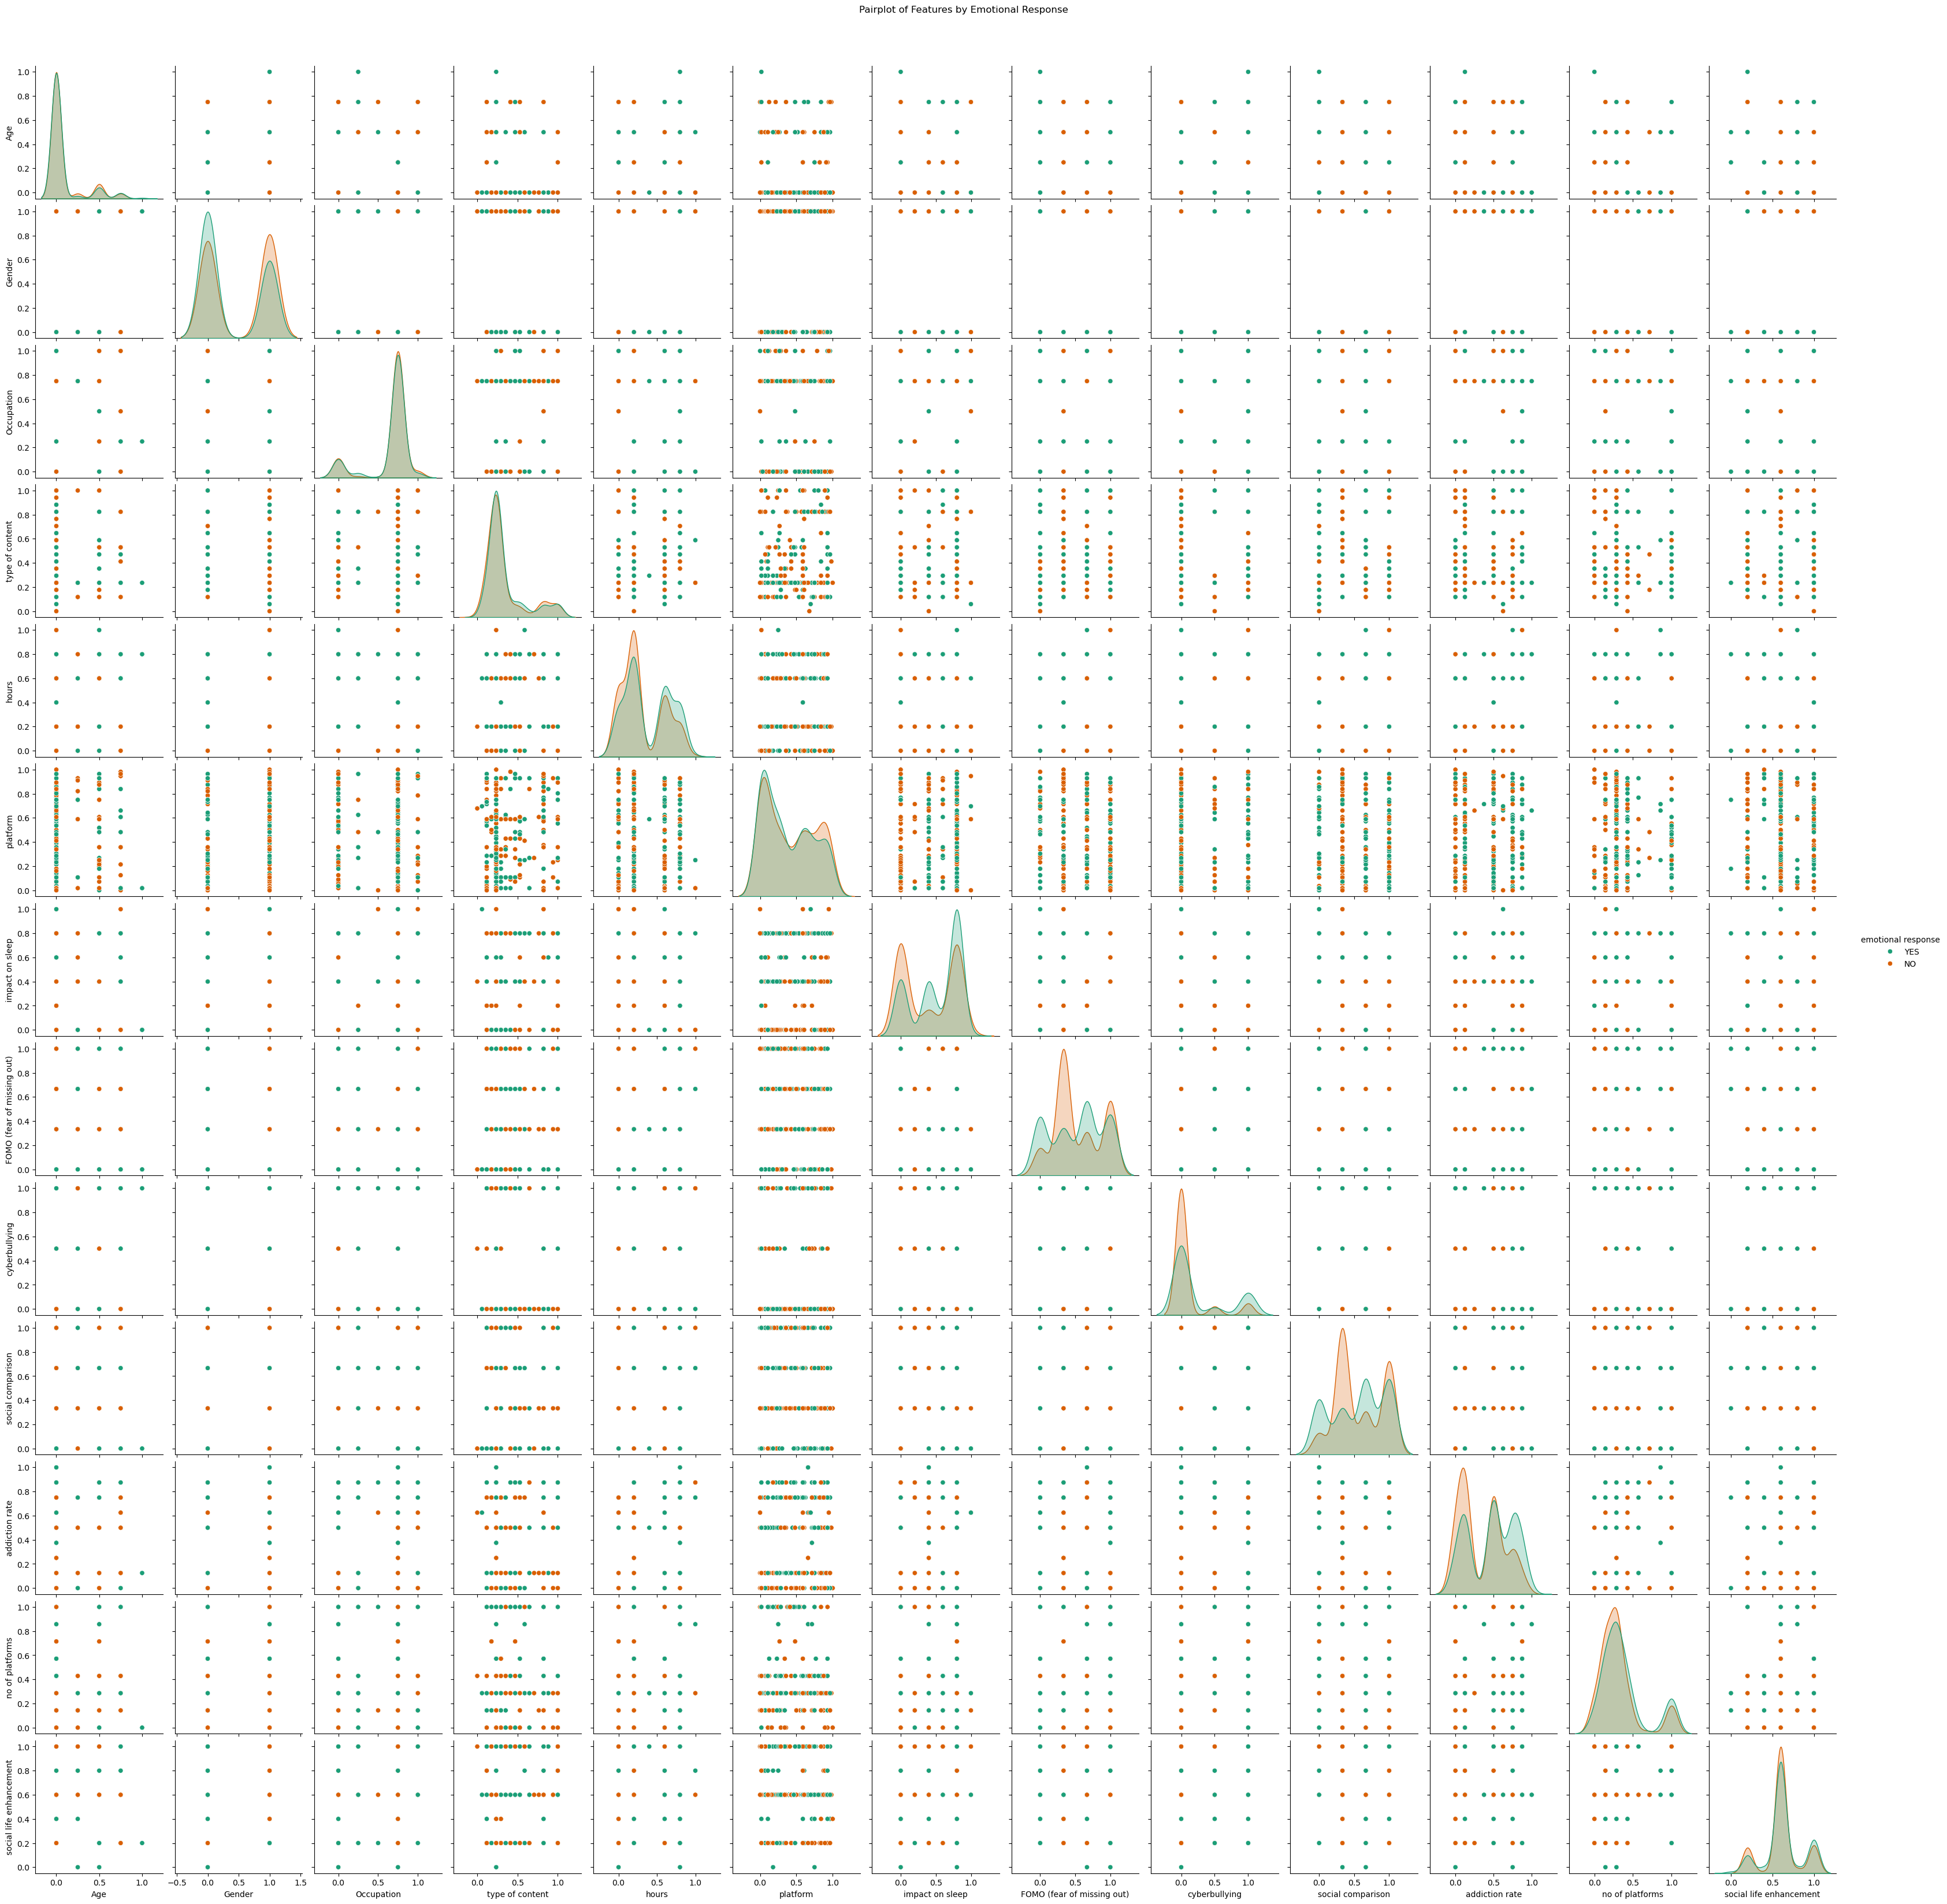

In [33]:
# Pairplot for visualizing relationships between features
# Create a copy of the dataset with labeled target for visualization
visualization_data = pd.concat([X, y], axis=1)  # Combine features and target for pairplot
visualization_data['emotional response'] = visualization_data['emotional response'].replace({1: 'YES', 0: 'NO'})  # Replace encoded values with labels

sns.pairplot(visualization_data, hue='emotional response', palette='Dark2', diag_kind="kde")
plt.suptitle("Pairplot of Features by Emotional Response", y=1.02)
plt.savefig("Pairplot visulization.png")  # Save the figure
plt.show()

In [34]:
# List of features (excluding 'emotional response')
features = [
    'Age', 'Gender', 'Occupation', 'type of content', 'hours', 
    'platform', 'impact on sleep', 'FOMO (fear of missing out)', 
    'cyberbullying', 'social comparison', 'addiction rate', 
    'no of platforms', 'social life enhancement'
]


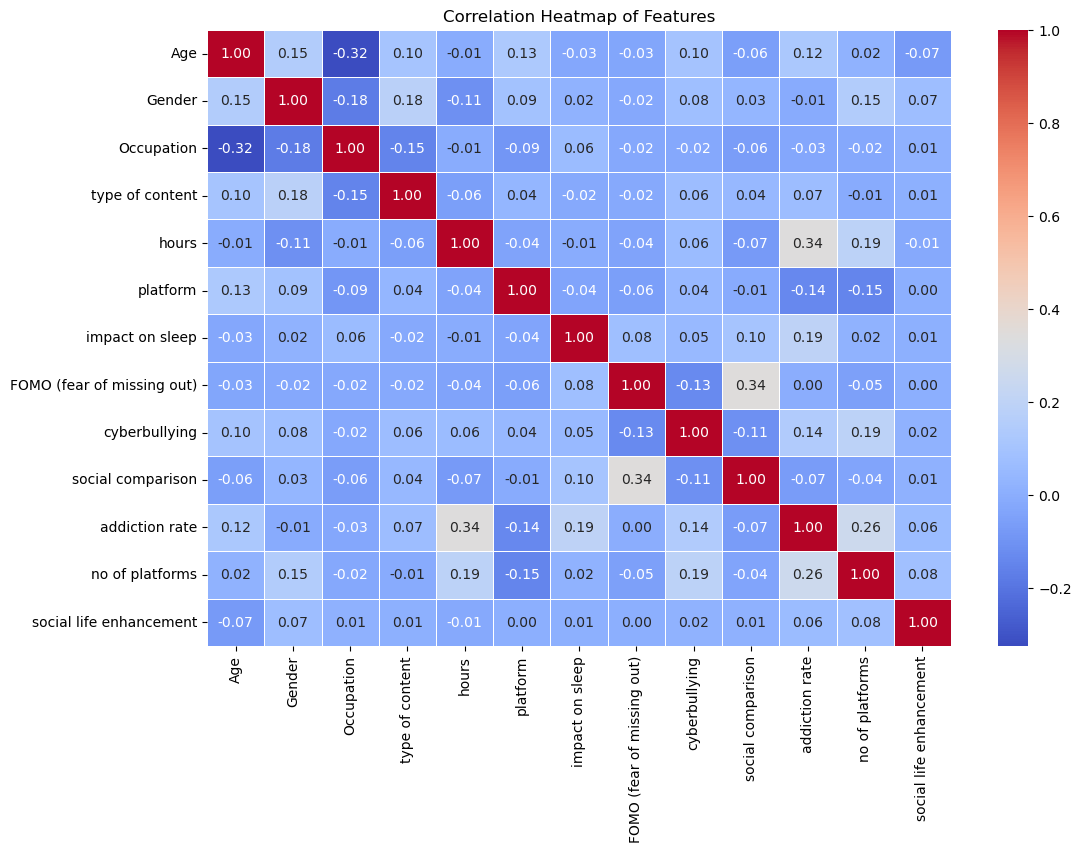

In [35]:
# Calculate the correlation matrix for the features (excluding the target 'emotional response')
correlation_matrix = data[features].corr()

# Set up the plot size and style
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title for the heatmap
plt.title("Correlation Heatmap of Features")

# Save the heatmap to a file
plt.savefig("corelation_Heatmap.png")  # Save the figure

# Show the plot
plt.show()

In [36]:
# Boxplot for each feature by emotional response
plt.figure(figsize=(12, 8))

# Calculate the number of rows and columns needed for the subplots
n_features = len(features.columns)
n_cols = 3  # Set the number of columns in the grid
n_rows = math.ceil(n_features / n_cols)  # Calculate the number of rows based on the number of features

# Iterate through features and plot boxplots
for idx, feature in enumerate(features.columns):  # Iterate through feature columns
    plt.subplot(n_rows, n_cols, idx + 1)  # Adjust rows/cols dynamically
    sns.boxplot(x='emotional response', y=feature, data=pd.concat([features, target], axis=1), palette='Set2')
    plt.title(f"Boxplot of {feature} by Emotional Response")
    plt.xlabel("Emotional Response")
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Boxplots_by_Emotional_Response.png')  # Save the plots as an image
plt.show()

AttributeError: 'list' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Scatter Plot for Two Features
feature1 = 'age'  # Replace with actual feature name in your dataset
feature2 = 'hours_spent'  # Replace with actual feature name in your dataset

# Ensure the features exist in X_test
if feature1 in X_test.columns and feature2 in X_test.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature1], X_test[feature2], c=y_pred.map({'NO': 0, 'YES': 1}), cmap='coolwarm', alpha=0.7)
    plt.title(f'Scatter Plot of {feature1} vs {feature2} (Colored by Predicted Target)')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.colorbar(label='Predicted Target (0=NO, 1=YES)')
    plt.show()
else:
    print(f"Error: One or both features '{feature1}' or '{feature2}' not found in X_test.")
